In [11]:
import pandas as pd
import matplotlib
import warnings
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab
import math
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

In [12]:
df_scroll_implicit = pd.read_csv('scroll_implicit.csv')
df_scroll_median = pd.read_csv('scroll_median.csv')
df_scroll_mobile = pd.read_csv('mobile_scroll.csv')

In [13]:
df_scroll_mobile['image_percent'] = df_scroll_mobile['img']/df_scroll_mobile['total']
df_scroll_implicit['image_percent'] = df_scroll_implicit['img']/df_scroll_implicit['total']
df_scroll_median['image_percent'] = df_scroll_median['img']/df_scroll_median['total']

df_scroll_mobile['js_percent'] = df_scroll_mobile['js']/df_scroll_mobile['total']
df_scroll_implicit['js_percent'] = df_scroll_implicit['js']/df_scroll_implicit['total']
df_scroll_median['js_percent'] = df_scroll_median['js']/df_scroll_median['total']

df_scroll_mobile = df_scroll_mobile.sort_values('image_percent', ascending=False)
df_scroll_mobile

,sitename,value,category,js,img,total,image_percent,js_percent
20,kongregate.com,6010,Games,3,30,43,0.697674,0.069767
41,ted.com,26951,Science,14,67,106,0.632075,0.132075
2,adf.ly,9419,Computer,26,42,87,0.482759,0.298851
26,mozilla.org,8473,Computer,8,17,36,0.472222,0.222222
10,cartoonnetwork.com,34324,Kids and Teens,25,39,90,0.433333,0.277778
48,wunderlist.com,11372,Home,5,13,32,0.406250,0.156250
13,costco.com,41371,Shopping,22,37,95,0.389474,0.231579
33,retailmenot.com,8108,Shopping,16,39,102,0.382353,0.156863
36,sfgate.com,47868,News,49,105,280,0.375000,0.175000
46,whitehouse.gov,11571,Society,8,19,51,0.372549,0.156863


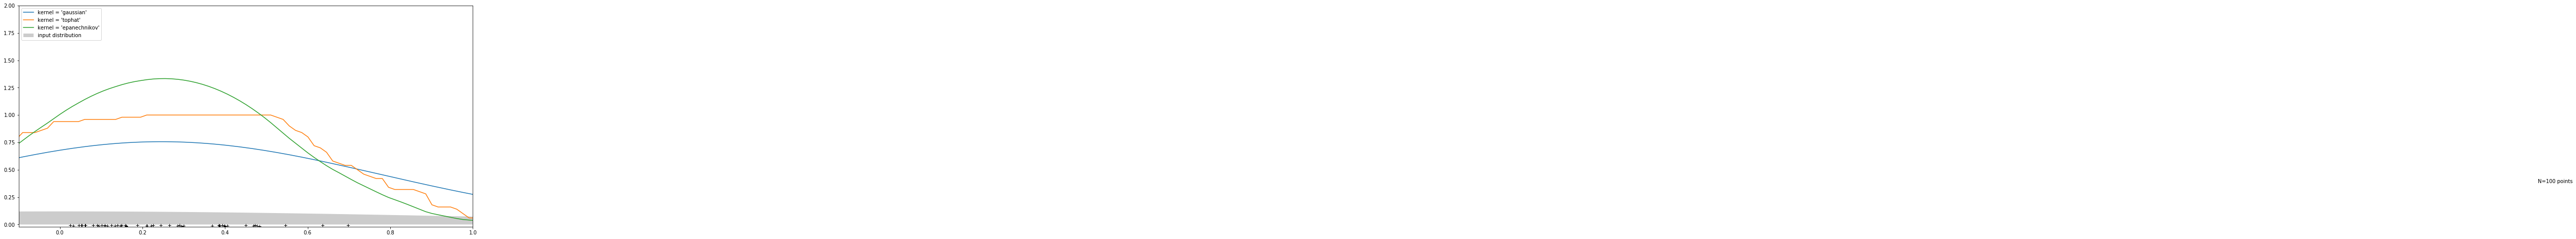

In [40]:
N = 100
np.random.seed(1)
#X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
#                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
X = df_scroll_implicit['image_percent'][:,np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots(figsize=(16, 8))
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')

for kernel in ['gaussian', 'tophat', 'epanechnikov']:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-0.1, 1)
ax.set_ylim(-0.02, 2)
plt.show()

In [32]:
df_mobile_new=pd.DataFrame(columns=['value_mean','value_std', 'img_category'])

df_scroll_mobile = df_scroll_mobile.sort_values('image_percent')
bins =  np.array([0.2])
ind = np.digitize(df_scroll_mobile['image_percent'],bins)

df_mobile_img = df_scroll_mobile.groupby(ind, as_index = False).mean()
print (df_mobile_img)

df_mobile_new['img_category'] = df_mobile_img['image_percent']
for index,row in df_mobile_img.iterrows():
    df_mobile_new.loc[df_mobile_new.img_category == row['image_percent'], 'value_mean']=row['value']
    if row['image_percent'] >= 0 and row['image_percent'] < 0.2:
        df_mobile_new.loc[df_mobile_new.img_category == row['image_percent'], 'img_category'] = "<20%"
    else: #row['image_percent'] >= 0.2: and row['image_percent'] < 0.4:
        df_mobile_new.loc[df_mobile_new.img_category == row['image_percent'], 'img_category'] = ">20%"
#     elif row['image_percent'] >= 0.4 and row['image_percent'] < 0.6:
#         df_mobile_new.loc[df_mobile_new.img_category == row['image_percent'], 'img_category'] = "40%-60%"
#     elif row['image_percent'] >= 0.6 and row['image_percent'] < 0.8:
#         df_mobile_new.loc[df_mobile_new.img_category == row['image_percent'], 'img_category'] = "60%-80%"
#     elif row['image_percent'] >= 0.8 and row['image_percent'] <= 1:
#         df_mobile_new.loc[df_mobile_new.img_category == row['image_percent'], 'img_category'] = "80%-100%"

df_mobile_img = df_scroll_mobile.groupby(ind, as_index = False).agg(np.std, ddof=1)

for index,row in df_mobile_img.iterrows():
    df_mobile_new.loc[df_mobile_new.index == index,'value_std']=row['value']
df_mobile_new

      value     js    img   total  image_percent  js_percent
0  30560.16  59.48  18.04  193.36       0.103488    0.307196
1  34385.80  26.48  41.32  121.60       0.360662    0.214576


,value_mean,value_std,img_category
0,30560.2,25191.7,<20%
1,34385.8,34168.9,>20%


In [35]:
df_implicit_new=pd.DataFrame(columns=['value_mean','value_std', 'img_category'])

df_scroll_implicit = df_scroll_implicit.sort_values('image_percent')
#bins =  np.arange(0,1.0,0.2)
bins = np.array([0.2])
ind = np.digitize(df_scroll_implicit['image_percent'],bins)

df_implicit_img = df_scroll_implicit.groupby(ind, as_index = False).mean()
#print (df_implicit_img)
df_implicit_new['img_category'] = df_implicit_img['image_percent']
for index,row in df_implicit_img.iterrows():
    df_implicit_new.loc[df_implicit_new.img_category == row['image_percent'], 'value_mean']=row['value']
    if row['image_percent'] >= 0 and row['image_percent'] < 0.2:
        df_implicit_new.loc[df_implicit_new.img_category == row['image_percent'], 'img_category'] = "<20%"
    else: #row['image_percent'] >= 0.2 and row['image_percent'] < 0.4:
        df_implicit_new.loc[df_implicit_new.img_category == row['image_percent'], 'img_category'] = ">20%"
#     elif row['image_percent'] >= 0.4 and row['image_percent'] < 0.6:
#         df_implicit_new.loc[df_implicit_new.img_category == row['image_percent'], 'img_category'] = "40%-60%"
#     elif row['image_percent'] >= 0.6 and row['image_percent'] < 0.8:
#         df_implicit_new.loc[df_implicit_new.img_category == row['image_percent'], 'img_category'] = "60%-80%"
#     elif row['image_percent'] >= 0.8 and row['image_percent'] <= 1:
#         df_implicit_new.loc[df_implicit_new.img_category == row['image_percent'], 'img_category'] = "80%-100%"

df_implicit_img = df_scroll_implicit.groupby(ind, as_index = False).agg(np.std, ddof=1)

for index,row in df_mobile_img.iterrows():
    df_implicit_new.loc[df_implicit_new.index == index,'value_std']=row['value']
df_implicit_new

,value_mean,value_std,img_category
0,10994.8,25191.7,<20%
1,12501.1,34168.9,>20%


In [36]:
df_median_new=pd.DataFrame(columns=['value_mean','value_std', 'img_category'])

df_scroll_median = df_scroll_median.sort_values('image_percent')
#print (df_scroll_median)
#bins =  np.arange(0,1.0,0.2)
bins = np.array([0.2])
ind = np.digitize(df_scroll_median['image_percent'],bins)

df_median_img = df_scroll_median.groupby(ind, as_index = False).mean()
#print (df_median_img)

df_median_new['img_category'] = df_median_img['image_percent']
for index,row in df_median_img.iterrows():
    df_median_new.loc[df_median_new.img_category == row['image_percent'], 'value_mean']=row['value']
    if row['image_percent'] >= 0 and row['image_percent'] < 0.2:
        df_median_new.loc[df_median_new.img_category == row['image_percent'], 'img_category'] = "<20%"
    else: #row['image_percent'] >= 0.2 and row['image_percent'] < 0.4:
        df_median_new.loc[df_median_new.img_category == row['image_percent'], 'img_category'] = ">20%"
#     elif row['image_percent'] >= 0.4 and row['image_percent'] < 0.6:
#         df_median_new.loc[df_median_new.img_category == row['image_percent'], 'img_category'] = "40%-60%"
#     elif row['image_percent'] >= 0.6 and row['image_percent'] < 0.8:
#         df_median_new.loc[df_median_new.img_category == row['image_percent'], 'img_category'] = "60%-80%"
#     elif row['image_percent'] >= 0.8 and row['image_percent'] <= 1:
#         df_median_new.loc[df_median_new.img_category == row['image_percent'], 'img_category'] = "80%-100%"

df_median_img = df_scroll_median.groupby(ind, as_index = False).agg(np.std, ddof=1)

for index,row in df_median_img.iterrows():
    df_median_new.loc[df_median_new.index == index,'value_std']=row['value']
df_median_new

,value_mean,value_std,img_category
0,14835,6980.1,<20%
1,15929,8395.37,>20%


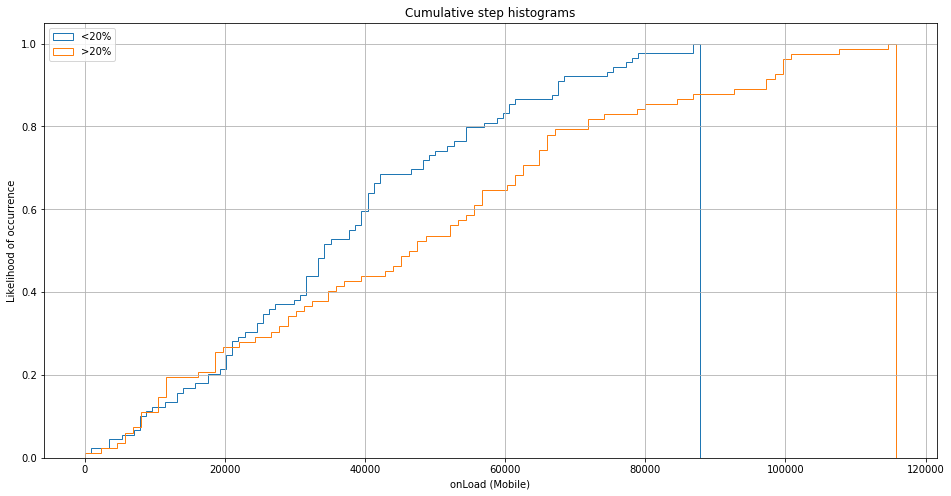

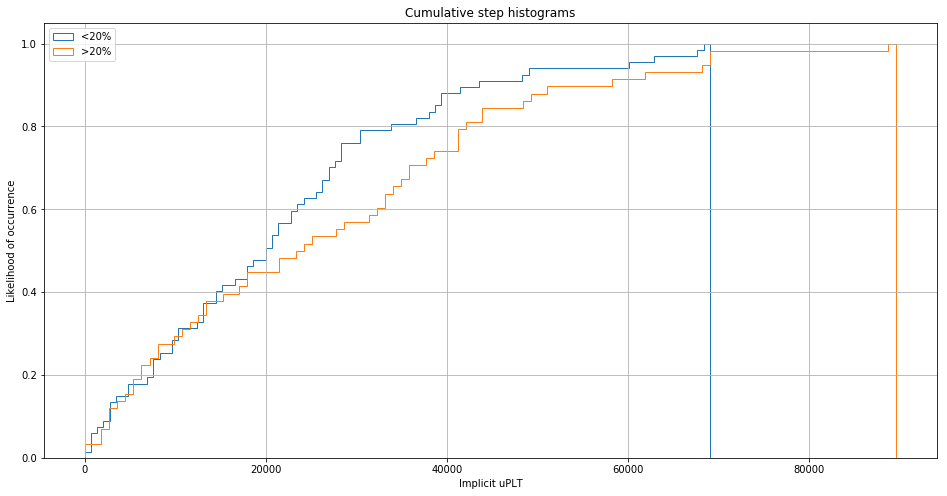

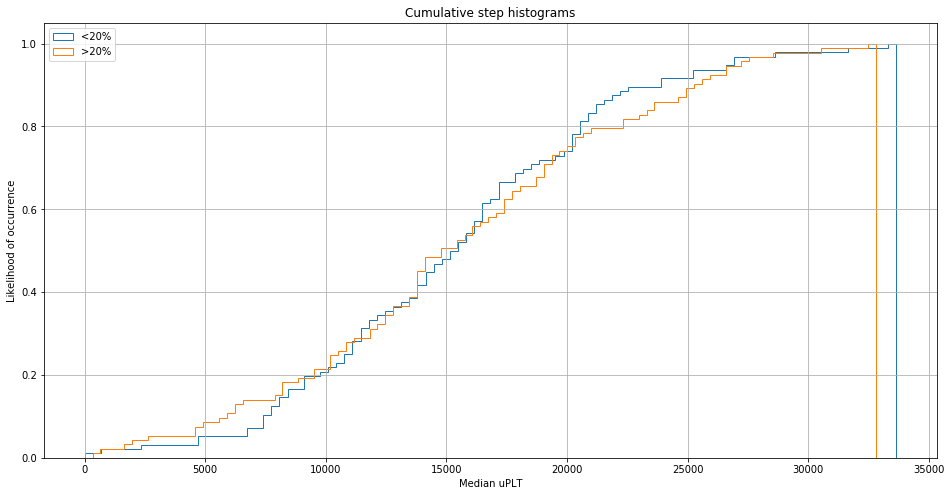

In [37]:
np.random.seed(0)

#mu = 200
#sigma = 25
n_bins = 100

fig, ax = plt.subplots(figsize=(16, 8))
fig2, ax2 = plt.subplots(figsize=(16, 8))
fig3, ax3 = plt.subplots(figsize=(16, 8))

for index,row in df_mobile_new.iterrows():
    if not math.isnan(row['value_std']):
        x = np.random.normal(row['value_mean'], row['value_std'], size=100)
        n, bins, patches = ax.hist(x, n_bins, normed=1, histtype='step',
                           cumulative=True, label=row['img_category'], range=(0, x.max()))
        #y = mlab.normpdf(bins, row['value_mean'], row['value_std']).cumsum()
        #y /= y[-1]
        #ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')
        

        
for index,row in df_implicit_new.iterrows():
    if not math.isnan(row['value_std']):
        x2 = np.random.normal(row['value_mean'], row['value_std'], size=100)
        n2, bins2, patches2 = ax2.hist(x2, n_bins, normed=1, histtype='step',
                           cumulative=True, label=row['img_category'], range=(0, x2.max()))
        
for index,row in df_median_new.iterrows():
    if not math.isnan(row['value_std']):
        x3 = np.random.normal(row['value_mean'], row['value_std'], size=100)
        n3, bins3, patches3 = ax3.hist(x3, n_bins, normed=1, histtype='step',
                           cumulative=True, label=row['img_category'], range=(0, x3.max()))


ax.grid(True)
ax.legend(loc='upper left')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('onLoad (Mobile)')
ax.set_ylabel('Likelihood of occurrence')

ax2.grid(True)
ax2.legend(loc='upper left')
ax2.set_title('Cumulative step histograms')
ax2.set_xlabel('Implicit uPLT')
ax2.set_ylabel('Likelihood of occurrence')

ax3.grid(True)
ax3.legend(loc='upper left')
ax3.set_title('Cumulative step histograms')
ax3.set_xlabel('Median uPLT')
ax3.set_ylabel('Likelihood of occurrence')

plt.show()